<a href="https://colab.research.google.com/github/khamzovich/cone_intersection/blob/main/Cone_intersection_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install numpy-stl

In [13]:
import math
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import cm

from mpl_toolkits.mplot3d.art3d import Poly3DCollection  # appropriate import to draw 3d polygons
from mpl_toolkits.mplot3d import Axes3D

# numpy-stl
# pip install numpy-stl
from stl import mesh

In [14]:
# drive.mount
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3D_diagrams

### Cone and Triangle

#### Equations

##### Координата вершины конуса в точке (0, 0, 0)

Каноническое уравнение конуса:

$\frac {x^2}{a^2}+\frac{y^2}{b^2}-\frac{z^2}{c^2}=0$

Для прямого кругового конуса a = b:

$\frac {x^2 + y^2}{a^2}-\frac{z^2}{c^2}=0$

$z ^ 2 = (x^2 + y^2)ctg^2\alpha$

$\alpha = \frac {a}{c}$ - угол раствора конуса

Получаем систему уравнений (1):

$ \begin{equation*}
\begin{cases}
X = \lambda \cdot a_x + x_M
\\
Y = \lambda \cdot a_y + y_M
\\
Z = \lambda \cdot a_z + z_M
\\
Z^2 =  (X ^ 2 + Y ^ 2) \cdot ctg^2 \alpha
\end{cases}
\end{equation*}$

Подставляем $X, Y, Z$ в последнее уравнение:

$(\lambda \cdot a_z + z_M) ^ 2 = ctg^2\alpha \cdot ((\lambda \cdot a_x + x_M) ^ 2 + (\lambda \cdot a_y + y_M) ^ 2)$

$\lambda ^ 2 a_z^2 + 2 \lambda a_z z_m + z_M^2 = ctg^2\alpha(\lambda ^ 2 a_x^2 + 2 \lambda a_x x_m + x_M^2 + \lambda ^ 2 a_y^2 + 2 \lambda a_y y_m + y_M^2)$

Получаем квадратное уравнение:

$(a_z^2 - a_x^2 ctg^2\alpha - a_y^2 ctg^2\alpha) \cdot \lambda ^ 2 + (2 a_z z_m - 2 a_x x_m ctg^2\alpha - 2 a_y y_m ctg^2\alpha) \cdot \lambda + z_M^2 - x_M^2 ctg^2\alpha - y_M^2 ctg^2\alpha = 0$

Заменяем коэффициенты уравнения:

$a_1 = a_z^2 - (a_x^2 + a_y^2) ctg^2\alpha$

$b_1 = 2 a_z z_M - 2 (a_x x_M + a_y y_M) ctg^2\alpha$

$c_1 = z_M^2 - (x_M^2 + y_M^2) ctg^2\alpha$

$a_1 \cdot \lambda ^ 2 + b_1 \cdot \lambda + c_1 = 0$

Находим корни уравнения:

$\lambda_1 = \frac {-b_1 - \sqrt {b_1^2 - 4a_1c_1}}{2a}$

$\lambda_2 = \frac {-b_1 + \sqrt {b_1^2 - 4a_1c_1}}{2a}$

Подставляем полученные значения $\lambda$ в систему уравнений (1) и получаем координаты точек пересечения прямой с конусной поверхностью

##### Координата вершины конуса смещена по оси z

**С координатой вершины конуса $z_0 \not= 0$:**

Получаем систему уравнений (2):

$ \begin{equation*}
\begin{cases}
X = \lambda \cdot a_x + x_M
\\
Y = \lambda \cdot a_y + y_M
\\
Z = \lambda \cdot a_z + z_M
\\
(Z - z_0)^2 =  (X ^ 2 + Y ^ 2) \cdot ctg^2\alpha
\end{cases}
\end{equation*}$

Подставляем $X, Y, Z$ в последнее уравнение:

$(\lambda \cdot a_z + z_M - z_0) ^ 2 = ctg^2\alpha \cdot ((\lambda \cdot a_x + x_M) ^ 2 + (\lambda \cdot a_y + y_M) ^ 2)$

$\lambda ^ 2 a_z^2 + 2 \lambda a_z z_m + z_M^2 - 2 \lambda a_z z_0 - 2 z_0 z_M + z_0^2 = ctg^2\alpha(\lambda ^ 2 a_x^2 + 2 \lambda a_x x_m + x_M^2 + \lambda ^ 2 a_y^2 + 2 \lambda a_y y_m + y_M^2)$

Получаем квадратное уравнение:

$(a_z^2 - a_x^2 ctg^2\alpha - a_y^2 ctg^2\alpha) \cdot \lambda ^ 2 + (2 a_z z_m - 2 a_z z_0 - 2 a_x x_m ctg^2\alpha - 2 a_y y_m ctg^2\alpha) \cdot \lambda - x_M^2 ctg^2\alpha - y_M^2 ctg^2\alpha - 2 z_0 z_M + z_M^2 + z_0^2 = 0$

Заменяем коэффициенты уравнения:

$a_1 = a_z^2 - (a_x^2 + a_y^2) ctg^2\alpha$

$b_1 = 2 \cdot (a_z z_M - a_z z_0 - (a_x x_M + a_y y_M) ctg^2\alpha)$

$c_1 = z_M^2 + z_0^2 - 2 z_0 z_M - (x_M^2 + y_M^2) ctg^2\alpha$

$a_1 \cdot \lambda ^ 2 + b_1 \cdot \lambda + c_1 = 0$

Находим корни уравнения:

$\lambda_1 = \frac {-b_1 - \sqrt {b_1^2 - 4a_1c_1}}{2a}$

$\lambda_2 = \frac {-b_1 + \sqrt {b_1^2 - 4a_1c_1}}{2a}$

#### Code

In [71]:
def cone_cross(p_1, p_2, alpha_cone, p_cone=np.array([0, 0, 0])):
    """
    Точка пересечения прямой и конусной поверхности
    p_1 - первая точка прямой
    p_2 - вторая точка прямой
    alpha_cone - угол раствора конуса
    p_cone - координаты вершины конусной поверхности
    """
    a = [p_2[0] - p_1[0], p_2[1] - p_1[1], p_2[2] - p_1[2]]  # координаты направляющего вектора прямой
    ctg_alpha_cone = 1 / np.tan(alpha_cone * math.pi / 180)
    a_1 = a[2] ** 2 - (a[0] ** 2 + a[1] ** 2) * ctg_alpha_cone ** 2
    # b_1 = 2 * a[2] * p_1[2] - 2 * (a[0] * p_1[0] + a[1] * p_1[1]) * ctg_alpha_cone ** 2
    b_1 = 2 * (a[2] * p_1[2] - a[2] * p_cone[2] - (a[0] * p_1[0] + a[1] * p_1[1]) * ctg_alpha_cone ** 2)
    # c_1 = p_1[2] ** 2 - (p_1[0] ** 2 + p_1[1] ** 2) * ctg_alpha_cone ** 2
    c_1 = p_1[2] ** 2 + p_cone[2] ** 2 - 2 * p_cone[2] * p_1[2] - (p_1[0] ** 2 + p_1[1] ** 2) * ctg_alpha_cone ** 2
    D = b_1 ** 2 - 4 * a_1 * c_1  # discriminant
    
    if D > 0:
        lam_1 = (-b_1 - D ** 0.5) / (2 * a_1)
        lam_2 = (-b_1 + D ** 0.5) / (2 * a_1)

        x_1 = lam_1 * a[0] + p_1[0]
        y_1 = lam_1 * a[1] + p_1[1]
        z_1 = lam_1 * a[2] + p_1[2]
        
        x_2 = lam_2 * a[0] + p_1[0]
        y_2 = lam_2 * a[1] + p_1[1]
        z_2 = lam_2 * a[2] + p_1[2]

        # список для проверки, что полученные точки лежат на отрезке
        check_points = [min(p_1[0], p_2[0]) <= x_1 <= max(p_1[0], p_2[0]),
                        min(p_1[1], p_2[1]) <= y_1 <= max(p_1[1], p_2[1]),
                        min(p_1[2], p_2[2]) <= z_1 <= max(p_1[2], p_2[2]),
                        min(p_1[0], p_2[0]) <= x_2 <= max(p_1[0], p_2[0]),
                        min(p_1[1], p_2[1]) <= y_2 <= max(p_1[1], p_2[1]),
                        min(p_1[2], p_2[2]) <= z_2 <= max(p_1[2], p_2[2])]
        if all(check_points) and z_1 <= p_cone[2] and z_2 <= p_cone[2]:
            return [[x_1, y_1, z_1], [x_2, y_2, z_2]]  # two intersection points
        elif all(check_points[:3]) and z_1 <= p_cone[2]:
            return [x_1, y_1, z_1]  # point [x_1, y_1, z_1]
        elif all(check_points[3:])  and z_2 <= p_cone[2]:
            return [x_2, y_2, z_2]  # point [x_2, y_2, z_2]

    elif D == 0:
        lam = -b_1 / (2 * a_1)
        x = lam * a[0] + p_1[0]
        y = lam * a[1] + p_1[1]
        z = lam * a[2] + p_1[2]
        return [x, y, z]  # одна точка пересечения

    return 0  # Нет точек пересечения


def create_line(p_1, p_2, color='g', linewidth=2):
    """
    Создание прямой на графике по двум точкам
    p_1 - первая точка прямой
    p_2 - вторая точка прямой
    color - цвет линии
    linewidth - толщина линии
    """
    return ax.plot([p_1[0], p_2[0]], [p_1[1], p_2[1]], [p_1[2], p_2[2]], color=color, linewidth=linewidth)

##### Cone and tetrahedron

In [ ]:
# tetrahedron
vertices = np.array(
    [
        [+3.0, +3.0, +0.5],
        [-3.0, +3.0, +0.5],
        [-3.0, -3.0, +0.5],
        [+3.0, -3.0, +0.5],
        [+0.0, +0.0, -9.0]
    ]
)

faces = np.array(
    [
        [4, 1, 0],
        [4, 2, 1],
        [3, 4, 0],
        [3, 4, 2],
        [3, 2, 1],
        [3, 1, 0]
    ]
)

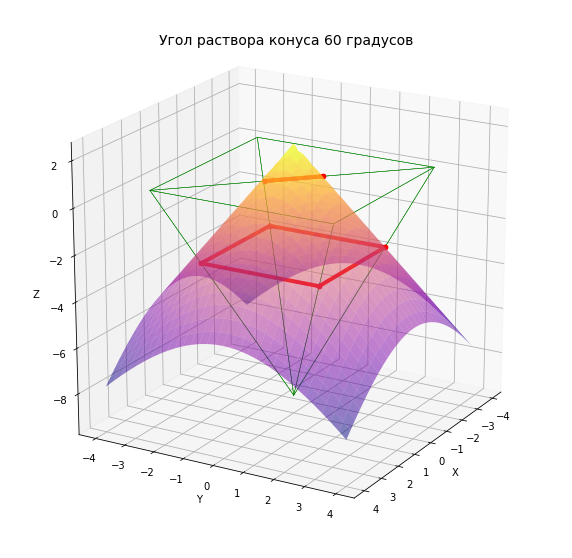

In [75]:
# create matplotlib diagram with cone and tetrahedron

alpha = 30  # угол раствора конуса
point = np.array([0, 0, 2])  # положение вершины конуса
f = lambda x, y: (1 / np.tan(alpha * math.pi / 180)) * ((x - point[0]) ** 2 + (y - point[1]) ** 2) ** 0.5 # уравнение конусной поверхности

fig = plt.figure(figsize = (10, 10))  # создаём полотно для рисунка
ax = fig.add_subplot(1, 1, 1, projection = '3d')  # создаём рисунок пространства с поверхностью

# размечаем границы осей для аргументов
xval = np.linspace(-4, 4, 300)
yval = np.linspace(-4, 4, 300)

# создаём массив с xval столбцами и yval строками
# - в этом массиве будут храниться значения z
x, y = np.meshgrid(xval, yval)

# приравниваем z к функции от x и y 
z = f(x, y) * (-1) + point[2]  # (-1) располагает вершину конуса сверху

# создаём поверхность
surf = ax.plot_surface(
    x, y, z,  # отмечаем аргументы и уравнение поверхности
    rstride = 10,
    cstride = 10,  # шаг прорисовки сетки (чем меньше значение, тем плавнее будет градиент на поверхности)
    cmap = cm.plasma,  # цветовая схема plasma
    alpha = .5
)

# add tetrahedron
for face in faces:
    t = []
    for i in face:
        t.append(vertices[i])

    cross_p_list = []
    for x, y in ((t[0], t[1]), (t[0], t[2]), (t[1], t[2])):
        create_line(x, y, 'g', .5)  # add triangle line
        cross_p = cone_cross(x, y, alpha, point)  # find cross points of line and cone
        # print(cross_p)
        if cross_p:
            if len(cross_p) == 3:  # one intersection point of line and cone
                if cross_p not in cross_p_list:
                    cross_p_list.append(cross_p)
                    ax.scatter(cross_p[0], cross_p[1], cross_p[2], color='r')  # add cross points of line and cone
            elif len(cross_p) == 2:  # two intersection points of line and cone
                ax.scatter(cross_p[0][0], cross_p[0][1], cross_p[0][2], color='r')
                ax.scatter(cross_p[1][0], cross_p[1][1], cross_p[1][2], color='r')
                cross_p_list = cross_p
    if len(cross_p_list) == 2:
        create_line(cross_p_list[0], cross_p_list[1], 'r', 4)  # add intersection lines

# set axes labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# set view settings
ax.view_init(elev=20, azim=30)

plt.title(f'Угол раствора конуса {alpha * 2} градусов', fontsize=14)

plt.show()

##### Cone and stl

In [57]:
# Load the STL files and add the vectors to the plot
my_mesh = mesh.Mesh.from_file('/content/drive/MyDrive/support_var2.stl')

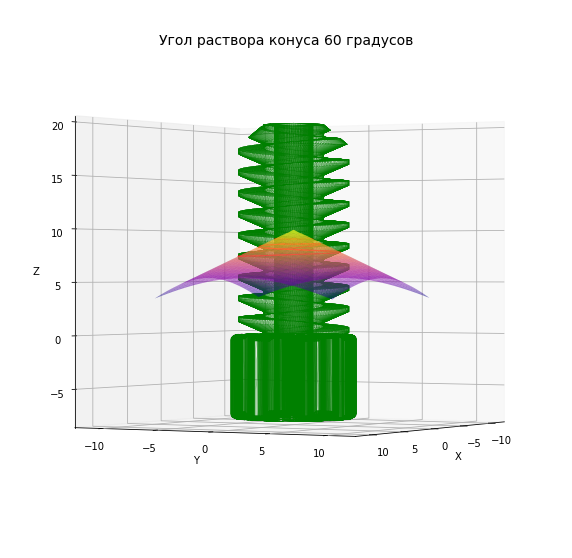

In [73]:
# create matplotlib diagram with cone and stl

alpha = 60  # угол раствора конуса
point = np.array([0, 0, 10])  # положение вершины конуса
f = lambda x, y: (1 / np.tan(alpha * math.pi / 180)) * ((x - point[0]) ** 2 + (y - point[1]) ** 2) ** 0.5 # уравнение конусной поверхности

fig = plt.figure(figsize = (10, 10))  # создаём полотно для рисунка
ax = fig.add_subplot(1, 1, 1, projection = '3d')  # создаём рисунок пространства с поверхностью

# размечаем границы осей для аргументов
xval = np.linspace(-8, 8, 300)
yval = np.linspace(-8, 8, 300)

# создаём массив с xval столбцами и yval строками
# - в этом массиве будут храниться значения z
x, y = np.meshgrid(xval, yval)

# приравниваем z к функции от x и y 
z = f(x, y) * (-1) + point[2]  # (-1) располагает вершину конуса сверху

# создаём поверхность
surf = ax.plot_surface(
    x, y, z,  # отмечаем аргументы и уравнение поверхности
    rstride = 10,
    cstride = 10,  # шаг прорисовки сетки (чем меньше значение, тем плавнее будет градиент на поверхности)
    cmap = cm.plasma,  # цветовая схема plasma
    alpha = .5
)

counter = 0

# add stl model
for triangle in my_mesh:
    t = []

    # set triangles limit to speed up test
    # counter += 1
    # if counter > 5000:
    #     break

    t.append(triangle[:3])
    t.append(triangle[3:6])
    t.append(triangle[6:9])

    cross_p_list = []
    for x, y in ((t[0], t[1]), (t[0], t[2]), (t[1], t[2])):
        create_line(x, y, 'g', .1)  # add triangle line
        cross_p = cone_cross(x, y, alpha, point)  # find cross points of line and cone
        # print(cross_p)
        if cross_p:
            if len(cross_p) == 3:  # one intersection point of line and cone
                if cross_p not in cross_p_list:
                    cross_p_list.append(cross_p)
                    #ax.scatter(cross_p[0], cross_p[1], cross_p[2], color='r')  # add cross points of line and cone
            elif len(cross_p) == 2:  # two intersection points of line and cone
                ax.scatter(cross_p[0][0], cross_p[0][1], cross_p[0][2], color='r')
                ax.scatter(cross_p[1][0], cross_p[1][1], cross_p[1][2], color='r')
                cross_p_list = cross_p
    if len(cross_p_list) == 2:
        create_line(cross_p_list[0], cross_p_list[1], 'r', 1)  # add intersection lines

# set axes labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# set scale
ax.set_xlim3d(-12, 12)
ax.set_ylim3d(-12, 12)
# ax.set_zlim3d(0, 3)

# set view settings
ax.view_init(elev=0, azim=30)

plt.title(f'Угол раствора конуса {alpha * 2} градусов', fontsize=14)

plt.show()